# EJERCICIO 1

In [12]:
import numpy as np
import scipy.stats as ss
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd

### apartado a) 

Cargar la tabla en Python usando Pandas, y convertir la altura de pulgadas a centímetros

In [13]:
df = pd.read_excel('VEF.xls')
height_cm = df['Altura(pulgadas)']*2.54
df['Altura(pulgadas)']=height_cm
df.rename(columns={'Altura(pulgadas)': 'Altura(cm)'}, inplace=True)
df 

,Id,Edad,VEF,Altura(cm),Sexo,Fumador
0,301,9,1.708,144.78,0,0
1,451,8,1.724,171.45,0,0
2,501,7,1.720,138.43,0,0
3,642,9,1.558,134.62,1,0
4,901,9,1.895,144.78,1,0
5,1701,8,2.336,154.94,0,0
6,1752,6,1.919,147.32,0,0
7,1753,6,1.415,142.24,0,0
8,1901,8,1.987,148.59,0,0
9,1951,9,1.942,152.40,0,0


### apartado b) 

Utilizar el método de estadísstica descriptiva que se crea más conveniente para representar las columnas ’Edad’, ’FEV’ y ’Altura’.

#### Histogramas:

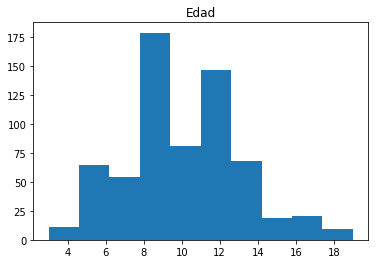

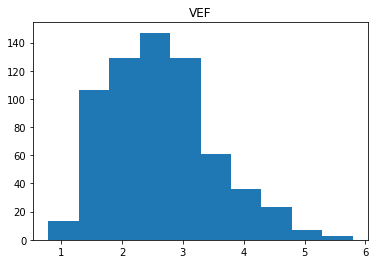

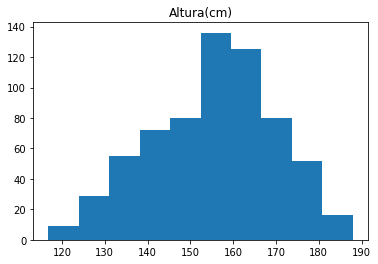

In [14]:
plt.hist(df['Edad'])
plt.title('Edad')
plt.show()

plt.hist(df['VEF'])
plt.title('VEF')
plt.show()

plt.hist(df['Altura(cm)'])
plt.title('Altura(cm)')
plt.show()

In [15]:
df.describe()

,Id,Edad,VEF,Altura(cm),Sexo,Fumador
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,37169.571865,9.931193,2.636780,155.304688,0.513761,0.099388
std,23690.860350,2.953935,0.867059,14.486923,0.500193,0.299412
min,201.000000,3.000000,0.791000,116.840000,0.000000,0.000000
25%,15811.000000,8.000000,1.981000,144.780000,0.000000,0.000000
50%,36071.000000,10.000000,2.547500,156.210000,1.000000,0.000000
75%,53638.500000,12.000000,3.118500,166.370000,1.000000,0.000000
max,90001.000000,19.000000,5.793000,187.960000,1.000000,1.000000


### apartado c) 

Utilizar el método de estadística descriptiva que se crea más conveniente para comparar los nivelesde FEV por género y por estatus de fumador. ¿Se puede obtener alguna conclusión?

In [16]:
def get_VEF_media(df,sexo,fumador):
    df2 = (df[['Edad','VEF', 'Sexo', 'Fumador']])
    #df = df2[df2['Edad'] <= 14][['Sexo','Fumador','VEF','Edad']]
    #df1 = df[df['Edad'] > 10][['Sexo','Fumador','VEF','Edad']]

    fumadores = df2[df2['Fumador']==fumador][['Sexo','Fumador','VEF']]   
    fumadores_sexo=fumadores[fumadores['Sexo']==sexo][['Sexo',"Fumador", "VEF"]] 
    
    #lista = pd.Series.tolist(fumadores_sexo['VEF'])
    
    return (fumadores_sexo['VEF'].mean())

In [17]:
chicos_f = get_VEF_media(df,1,1)
chicas_f = get_VEF_media(df,0,1)
chicos_nf = get_VEF_media(df,1,0)
chicas_nf = get_VEF_media(df,0,0)

media_chicas = (chicas_nf, chicas_f)
media_chicos = (chicos_nf, chicos_f)


Creamos el histograma:

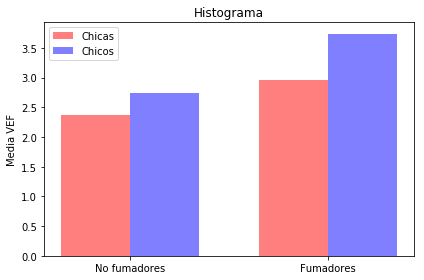

In [18]:
fig1, ax1 = plt.subplots()
bar_width = 0.35
opacidad = 0.5
n_barras = np.arange(2) #queremos dos grupos de barras


bar_1 = plt.bar(n_barras, media_chicas, bar_width, alpha=opacidad, color='r', label='Chicas')
 
bar_2 = plt.bar(n_barras + bar_width, media_chicos, bar_width, alpha=opacidad, color='blue', label='Chicos')

plt.ylabel('Media VEF')
plt.title('Histograma')
plt.xticks(n_barras + bar_width/2, ('No fumadores', 'Fumadores')) #colocamos las labels
plt.legend()
plt.tight_layout() 

plt.show()

In [19]:
def get_VEF(df,sexo,fumador):
    df2 = (df[['Edad','VEF', 'Sexo', 'Fumador']])
    df = df2[df2['Edad'] <= 14][['Sexo','Fumador','VEF','Edad']]
    df1 = df[df['Edad'] > 10][['Sexo','Fumador','VEF','Edad']]

    fumadores = df1[df1['Fumador']==fumador][['Sexo','Fumador','VEF']]   
    fumadores_sexo=fumadores[fumadores['Sexo']==sexo][['Sexo',"Fumador", "VEF"]] 
    
    lista = pd.Series.tolist(fumadores_sexo['VEF'])
    
    return (lista)

In [20]:
chicos_f = get_VEF(df,1,1)
chicas_f = get_VEF(df,0,1)
chicos_nf = get_VEF(df,1,0)
chicas_nf = get_VEF(df,0,0)

data = [chicas_nf,chicos_nf,chicas_f,chicos_f]

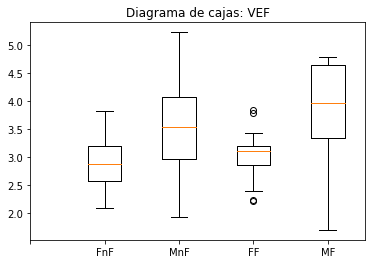

In [21]:
fig2, ax2 = plt.subplots()
ax2.set_title('Diagrama de cajas: VEF')
ax2.boxplot(data)

bars = ['','FnF','MnF','FF','MF']  #F = female    M = male
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

plt.show()

Lass circunferencias pequeñas son valores atípicos.

- $\textbf{FnF} \rightarrow $ Chicas no fumadoras.
- $\textbf{FF}\rightarrow$ Chicas fumadoras.
- $\textbf{MnF}\rightarrow$ Chicos no fumadores.
- $\textbf{MF}\rightarrow$ Chicos fumadores.